In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import xml.etree.ElementTree as ET
from collections import defaultdict
import pymzml
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
def get_user_param_value(param):
    if param.attrib['type'] == 'string':
        return param.attrib['value']
    elif param.attrib['type'] == 'int':
        return int(param.attrib['value'])
    elif param.attrib['type'] == 'float':
        return float(param.attrib['value'])
    else:
        assert False, param.attrib['type']

def from_user_param(node):
    r = {}
    for x in node.findall('UserParam'):
        r[x.attrib['name']] = get_user_param_value(x)
    return r

In [5]:
class XMLNode:
    def __init__(self, node):
        self.node = node
        self.d = {}
        self.d.update(node.attrib)
        self.d.update(from_user_param(node))

    def __getattr__(self, attr):
        if attr in self.d:
            return self.d[attr]
        return super().__getattr__(attr)

    def __getitem__(self, item):
        return self.d[item]

In [6]:
class XLMS_res:
    def __init__(self, filename = None):
        self.filename = filename
        if filename:
            self.xml = ET.parse(filename)

    @staticmethod
    def from_old(old):
        new = XLMS_res()
        new.filename = old.filename
        new.xml = old.xml
        return new

    def pep_matches(self):
        return self.xml.findall('IdentificationRun/PeptideIdentification')
        # nodup_res = []
        # peps = set()
        # for pepid in self.xml.findall('IdentificationRun/PeptideIdentification'):
        #     for 

    def all_spectrum(self):
        r = defaultdict(list)
        for pepid in self.pep_matches():
            # pephits = pepid.findall('PeptideHit')
            # # assert 1 <= len(pephits) <= 2, pephits
            # pephits = list(map(PepHit, pephits))
            r[pepid.attrib['spectrum_reference']].append(pepid)
        return r

# res = XLMS_res.from_old(res)
# res

In [15]:
from load_search_result import *
from extract_search_result import *

In [18]:
register_info_dir('../results/info')

In [19]:
df = load_res('ALott')
df

,score_type,higher_score_better,significance_threshold,MZ,RT,spectrum_reference,xl_chain,xl_pos1,spectrum_index,xl_type,...,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score,accession,is decoy,aa_before,aa_after
,,,,,,,,,,,,,,,,,,,,,
0,OpenPepXL:score,True,0.0,644.3593,2504.3519223423,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,4,5454,cross-link,...,375,211,sp|P0DMV9|HS71B_HUMAN,target,target,0.0,['sp|P0DMV9|HS71B_HUMAN'],False,['R'],['N']
1,OpenPepXL:score,True,0.0,620.383361816406,2505.91807038498,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,2,5458,cross-link,...,591,433,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['R'],['C']
2,OpenPepXL:score,True,0.0,620.383361816406,2505.91807038498,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,2,5458,cross-link,...,591,433,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['C']
3,OpenPepXL:score,True,0.0,620.383361816406,2505.91807038498,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,7,5458,cross-link,...,596,433,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['C']
4,OpenPepXL:score,True,0.0,620.383361816406,2505.91807038498,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,2,5458,cross-link,...,591,590,sp|P0DMV9|HS71B_HUMAN,target,target,0.0,['sp|P0DMV9|HS71B_HUMAN'],False,['K'],['C']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726486,OpenPepXL:score,True,0.0,792.736022949219,1794.0042482109059,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,7,8148,cross-link,...,588,580,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['F']
2726487,OpenPepXL:score,True,0.0,655.6445,1794.469098398208,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,2,8150,cross-link,...,260,270,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['I']
2726488,OpenPepXL:score,True,0.0,655.6445,1794.469098398208,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,7,8150,mono-link,...,265,-,-,target,-,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['I']


In [20]:
df = df.groupby('spectrum_reference').apply(lambda x: x.iloc[:2]).reset_index()

ValueError: cannot insert spectrum_reference, already exists

In [7]:
psms = res.pep_matches()
len(psms)

NameError: name 'res' is not defined

In [8]:
pepid = res.all_spectrum()
len(pepid)

NameError: name 'res' is not defined

In [9]:
pepid['controllerType=0 controllerNumber=1 scan=2831']

NameError: name 'pepid' is not defined

## Filter Matches

In [10]:
def apply_pepid_filter(d, f):
    r = {k: [x for x in l if f(x)] for k, l in d.items()}
    return r

def add_mem_var(f):
    mem = set()
    def _f(*args):
        f(args, mem)
    return mem

def filter_dup_pep(x, mem):
    alpha_seq = XMLNode(x.find('PeptideHit')).sequence
    beta_seq = XMLNode(x.find('PeptideHit')).sequence_beta
    pep = (alpha_seq, beta_seq)
    if pep in mem:
        return False
    mem.add(pep)
    return True
filter_dup_pep_gen = lambda mem: lambda x: filter_dup_pep(x, mem)

def filter_top2(x):
    return XMLNode(x).xl_rank <= 2

def apply_spectrum_filter(d, f):
    r = {k: l for k, l in d.items() if f(l)}
    return r

def filter_high_s2(l):
    if len(l) < 2:
        return False
    p2 = l[1]
    return XMLNode(p2.find('PeptideHit'))['OpenPepXL:score'] * 300 > 175

def filter_all_xl(l):
    for x in l:
        if XMLNode(x).xl_type != 'cross-link':
            return False
    return True

In [57]:
pepid_top2 = apply_pepid_filter(pepid, filter_top2)

In [58]:
pepid_top2['controllerType=0 controllerNumber=1 scan=2831']

[<Element 'PeptideIdentification' at 0x000001F27FBEA340>,
 <Element 'PeptideIdentification' at 0x000001F27FBED2B0>]

In [63]:
pepid_high_s2 = apply_spectrum_filter(pepid_top2, filter_high_s2)
len(pepid_high_s2)

397

In [137]:
pepid_high_s2 = apply_spectrum_filter(pepid_high_s2, filter_all_xl)
len(pepid_high_s2)

256

In [138]:
pepid_high_s2.keys()

dict_keys(['controllerType=0 controllerNumber=1 scan=5236', 'controllerType=0 controllerNumber=1 scan=5710', 'controllerType=0 controllerNumber=1 scan=5964', 'controllerType=0 controllerNumber=1 scan=6052', 'controllerType=0 controllerNumber=1 scan=6131', 'controllerType=0 controllerNumber=1 scan=6336', 'controllerType=0 controllerNumber=1 scan=7110', 'controllerType=0 controllerNumber=1 scan=8069', 'controllerType=0 controllerNumber=1 scan=8115', 'controllerType=0 controllerNumber=1 scan=8562', 'controllerType=0 controllerNumber=1 scan=8817', 'controllerType=0 controllerNumber=1 scan=9028', 'controllerType=0 controllerNumber=1 scan=9191', 'controllerType=0 controllerNumber=1 scan=9200', 'controllerType=0 controllerNumber=1 scan=9213', 'controllerType=0 controllerNumber=1 scan=9223', 'controllerType=0 controllerNumber=1 scan=9255', 'controllerType=0 controllerNumber=1 scan=9256', 'controllerType=0 controllerNumber=1 scan=9270', 'controllerType=0 controllerNumber=1 scan=9312', 'controll

In [82]:
ns = 'http://psi.hupo.org/ms/mzml'
nsmap = {'': ns}

In [9]:
specref_reg = re.compile('.* scan=(\d+)')

class mzML:
    def __init__(self, filename = None):
        self.filename = filename
        if filename:
            self.mzml = pymzml.run.Reader(filename)

    @staticmethod
    def from_old(old):
        new = mzML()
        new.filename = old.filename
        new.mzml = old.mzml
        return new

    def find(self, spec_ref):
        m = specref_reg.match(spec_ref)
        if not m:
            return None
        id = int(m.group(1))
        return self.mzml[id]



In [112]:
mzml = mzML('../spec/alban/20210702_L1_UM5_alban001_SA_EXT00_Ilse_fbn_dss2_450mm.mzML')
mzml

[Warning] Not index found and build_index_from_scratch is False


In [113]:
mzml.find('controllerType=0 controllerNumber=1 scan=18105')

<__main__.Spectrum object with native ID 18105 at 0x1f46027b610>

## Spectrum

In [11]:
class Spectrum:
    def __init__(self, spec):
        self.spec = spec

    def peaks(self):
        return self.spec.peaks('raw')
        
    def plot(self, xlim, ax = None):
        if not ax:
            plt.figure()
            ax = plt.subplot(1, 1, 1)
        bars = self.peaks()
        ax.bar(bars[:, 0], bars[:, 1], color='red')
        # ax.set_ylim([0, 2.5e5])
        # ax.set_xlim([0, 800])
        ax.set_xlim([0, xlim])

    def plot_ann(self, ann_str, ax = None):
        if not ax:
            plt.figure()
            ax = plt.subplot(1, 1, 1)
        
        frags = []
        for frag in split_string(ann_str):
            x, y, _, label = frag.split(',')
            x = eval(x)
            y = find_intensity(x, spec.peaks())
            frags.append((x, y, eval(label)))

        frags = pd.DataFrame(frags)
        print(frags)
        
        ax.bar(frags[0], frags[1])

        ax.set_ylim([0, frags[1].max()])

        counts = defaultdict(int)
        for i, (x, y, label) in frags.iterrows():
            yoff = counts[x] * 1
            counts[x] += 1
            ax.annotate(label, (x, y), (0, yoff), xycoords='data', textcoords='offset fontsize')


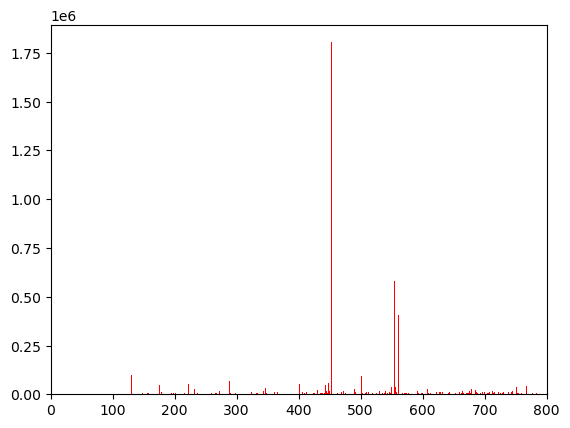

In [220]:
spec = Spectrum(mzml.find('controllerType=0 controllerNumber=1 scan=5236'))
spec.plot()

In [196]:
spec.peaks()[:,1].argmax()

169

In [197]:
spec.peaks()[169]

array([4.52997833e+02, 1.80468550e+06])

In [201]:
spec.peaks()[:,0]

array([ 120.08093262,  123.17110443,  124.93912506,  126.09191132,
        128.57928467,  129.0660553 ,  129.10247803,  130.0500946 ,
        130.08651733,  130.10585022,  130.11076355,  131.09040833,
        133.04328918,  134.64541626,  135.03924561,  136.07601929,
        139.08731079,  145.23434448,  146.08103943,  147.10694885,
        147.11315918,  148.116745  ,  155.08166504,  156.07699585,
        157.10906982,  157.13383484,  158.09280396,  159.07722473,
        175.07199097,  175.11949158,  176.12333679,  179.04901123,
        195.08818054,  198.12423706,  199.10845947,  201.12388611,
        203.06730652,  207.08795166,  212.10392761,  213.08760071,
        213.12492371,  213.60926819,  216.13517761,  222.12245178,
        222.62425232,  229.11943054,  232.0760498 ,  232.14134216,
        234.1461792 ,  237.09910583,  237.13626099,  241.08345032,
        259.09381104,  261.1567688 ,  262.11791992,  266.12619019,
        267.17184448,  271.12384033,  271.17819214,  272.10705

## Plot XLMS

In [11]:
def split_string(s):
    """
    Splits the string 's' by '|' character, but does not break strings within quotes.
    
    Args:
    s (str): The string to be split.

    Returns:
    List[str]: A list of substrings.
    """
    result = []
    current = ''
    in_quote = False
    escape = False

    for char in s:
        if char == '"' and not escape:
            in_quote = not in_quote
        if char == '|' and not in_quote:
            result.append(current)
            current = ''
        else:
            current += char
        escape = (char == '\\' and not escape)

    # Add the last segment
    if current:
        result.append(current)

    return result


In [12]:
def find_intensity(x, spec):
    y = spec[np.isclose(spec[:, 0], x)][0, 1]
    # print(y)
    return y

In [13]:
class XLMS_id:
    def __init__(self, pepid):
        self.pepid = pepid

    def plot(self, spec, ax = None):
        if not ax:
            ax = plt.subplot(1, 1, 1)

        alpha = XMLNode(self.pepid.find('PeptideHit[1]'))
        beta = XMLNode(self.pepid.find('PeptideHit[2]'))

        # print(alpha, beta)
        # print(alpha.fragment_annotation)

        frags = []
        for frag in split_string(alpha.fragment_annotation):
            # print(frag)
            x, y, _, label = frag.split(',')
            x = eval(x)
            y = find_intensity(x, spec.peaks())
            frags.append((x, y, eval(label)))

        frags = pd.DataFrame(frags)
        print(frags)
        
        ax.bar(frags[0], frags[1])

        ax.set_ylim([0, frags[1].max()])

        counts = defaultdict(int)
        for i, (x, y, label) in frags.iterrows():
            yoff = counts[x] * 1
            counts[x] += 1
            ax.annotate(label, (x, y), (0, yoff), xycoords='data', textcoords='offset fontsize')

plt.figure(figsize=[8, 6], dpi=320)
xlms_id = XLMS_id(pepid_high_s2['controllerType=0 controllerNumber=1 scan=5236'][0])
xlms_id.plot(spec)

NameError: name 'pepid_high_s2' is not defined

<Figure size 2560x1920 with 0 Axes>

## Plot Both

             0             1                   2
0   130.050095   4265.267578        [beta|ci$b1]
1   130.086517  97807.601562  [alpha|ci$y1-H3N1]
2   130.086517  97807.601562   [beta|ci$y1-H3N1]
3   147.113159  85678.523438       [alpha|ci$y1]
4   147.113159  85678.523438        [beta|ci$y1]
5   148.116745   5871.193359       [alpha|ci$y1]
6   148.116745   5871.193359        [beta|ci$y1]
7   290.118347   5003.562012   [beta|ci$y2-H3N1]
8   307.144623  32367.666016        [beta|ci$y2]
9   448.244904  60104.292969           [M+H]-NH3
10  452.498657   6232.931152               [M+H]
11  495.280457  13086.640625   [beta|xi$b3-H3N1]
12  501.281708  95832.945312        [beta|xi$b3]
13  548.622498  20491.769531  [alpha|xi$b7-H3N1]
14  548.622498  20491.769531   [beta|xi$b4-H3N1]
15  554.296997  31162.712891       [alpha|xi$b7]
16  554.296997  31162.712891        [beta|xi$b4]
17  742.414673  11273.465820   [beta|xi$b3-H3N1]
18  751.417358  34799.320312        [beta|xi$b3]


<Figure size 640x480 with 0 Axes>

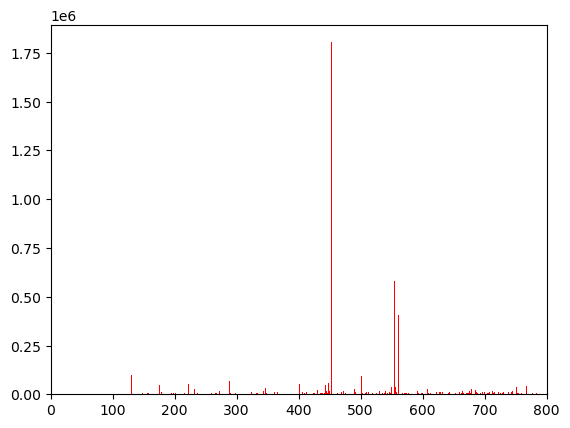

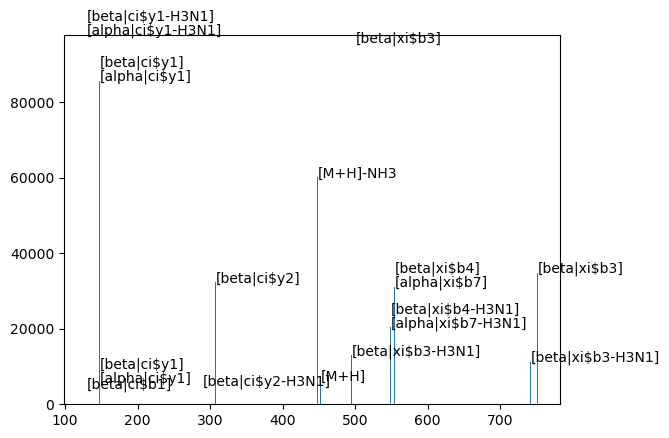

In [259]:
spec_ref = 'controllerType=0 controllerNumber=1 scan=5236'

# ax = plt.subplot(1, 1, 1)
plt.figure()
spec = Spectrum(mzml.find(spec_ref))
spec.plot()

plt.figure()
xlms_id = XLMS_id(pepid_high_s2[spec_ref][0])
xlms_id.plot(spec)

In [275]:
XMLNode(pepid_high_s2[spec_ref][1].find('PeptideHit'))['OpenPepXL:score'] * 300

177.7652125795104

In [284]:
XMLNode(pepid_high_s2[spec_ref][0].find('PeptideHit[1]')).d

{'score': '0.594696488208306',
 'sequence': 'VDKKVEPK',
 'charge': '4',
 'aa_before': 'K',
 'aa_after': 'S',
 'start': '93',
 'end': '100',
 'protein_refs': 'PH_8',
 'fragment_annotation': '130.050094604492188,2.363441046327353e-03,1,"[beta|ci$b1]"|130.086517333984375,0.054196480661631,1,"[alpha|ci$y1-H3N1]"|130.086517333984375,0.054196480661631,1,"[beta|ci$y1-H3N1]"|147.1131591796875,0.047475598752499,1,"[alpha|ci$y1]"|147.1131591796875,0.047475598752499,1,"[beta|ci$y1]"|148.116744995117188,3.253305563703179e-03,1,"[alpha|ci$y1]"|148.116744995117188,3.253305563703179e-03,1,"[beta|ci$y1]"|290.11834716796875,2.772539621219039e-03,1,"[beta|ci$y2-H3N1]"|307.144622802734375,0.0179353505373,1,"[beta|ci$y2]"|448.244903564453125,0.241945222020149,4,"[M+H]-NH3"|452.4986572265625,2.741323232650757,4,"[M+H]"|495.28045654296875,0.022277658805251,3,"[beta|xi$b3-H3N1]"|501.281707763671875,0.112767525017262,3,"[beta|xi$b3]"|548.62249755859375,0.071265533566475,3,"[alpha|xi$b7-H3N1]"|548.622497558593

In [283]:
XMLNode(pepid_high_s2[spec_ref][1].find('PeptideHit[1]')).d

{'score': '0.592550708598368',
 'sequence': 'VDKKVEPK',
 'charge': '4',
 'aa_before': 'K',
 'aa_after': 'S',
 'start': '93',
 'end': '100',
 'protein_refs': 'PH_8',
 'fragment_annotation': '130.050094604492188,2.363441046327353e-03,1,"[beta|ci$b1]"|130.086517333984375,0.054196480661631,1,"[alpha|ci$y1-H3N1]"|130.086517333984375,0.054196480661631,1,"[beta|ci$y1-H3N1]"|147.1131591796875,0.047475598752499,1,"[alpha|ci$y1]"|147.1131591796875,0.047475598752499,1,"[beta|ci$y1]"|148.116744995117188,3.253305563703179e-03,1,"[alpha|ci$y1]"|148.116744995117188,3.253305563703179e-03,1,"[beta|ci$y1]"|290.11834716796875,2.772539621219039e-03,1,"[beta|ci$y2-H3N1]"|307.144622802734375,0.0179353505373,1,"[beta|ci$y2]"|448.244903564453125,0.241945222020149,4,"[M+H]-NH3"|452.4986572265625,2.741323232650757,4,"[M+H]"|495.28045654296875,0.022277658805251,3,"[beta|xi$b3-H3N1]"|501.281707763671875,0.112767525017262,3,"[beta|xi$b3]"|548.62249755859375,0.071265533566475,3,"[alpha|xi$b7-H3N1]"|548.622497558593

             0             1                   2
0   130.050095   4265.267578        [beta|ci$b1]
1   130.086517  97807.601562  [alpha|ci$y1-H3N1]
2   130.086517  97807.601562   [beta|ci$y1-H3N1]
3   147.113159  85678.523438       [alpha|ci$y1]
4   147.113159  85678.523438        [beta|ci$y1]
5   148.116745   5871.193359       [alpha|ci$y1]
6   148.116745   5871.193359        [beta|ci$y1]
7   290.118347   5003.562012   [beta|ci$y2-H3N1]
8   307.144623  32367.666016        [beta|ci$y2]
9   448.244904  60104.292969           [M+H]-NH3
10  452.498657   6232.931152               [M+H]
11  495.280457  13086.640625   [beta|xi$b3-H3N1]
12  501.281708  95832.945312        [beta|xi$b3]
13  548.622498  20491.769531  [alpha|xi$b7-H3N1]
14  548.622498  20491.769531   [beta|xi$b4-H3N1]
15  554.296997  31162.712891       [alpha|xi$b7]
16  554.296997  31162.712891        [beta|xi$b4]
17  742.414673  11273.465820   [beta|xi$b3-H3N1]
18  751.417358  34799.320312        [beta|xi$b3]


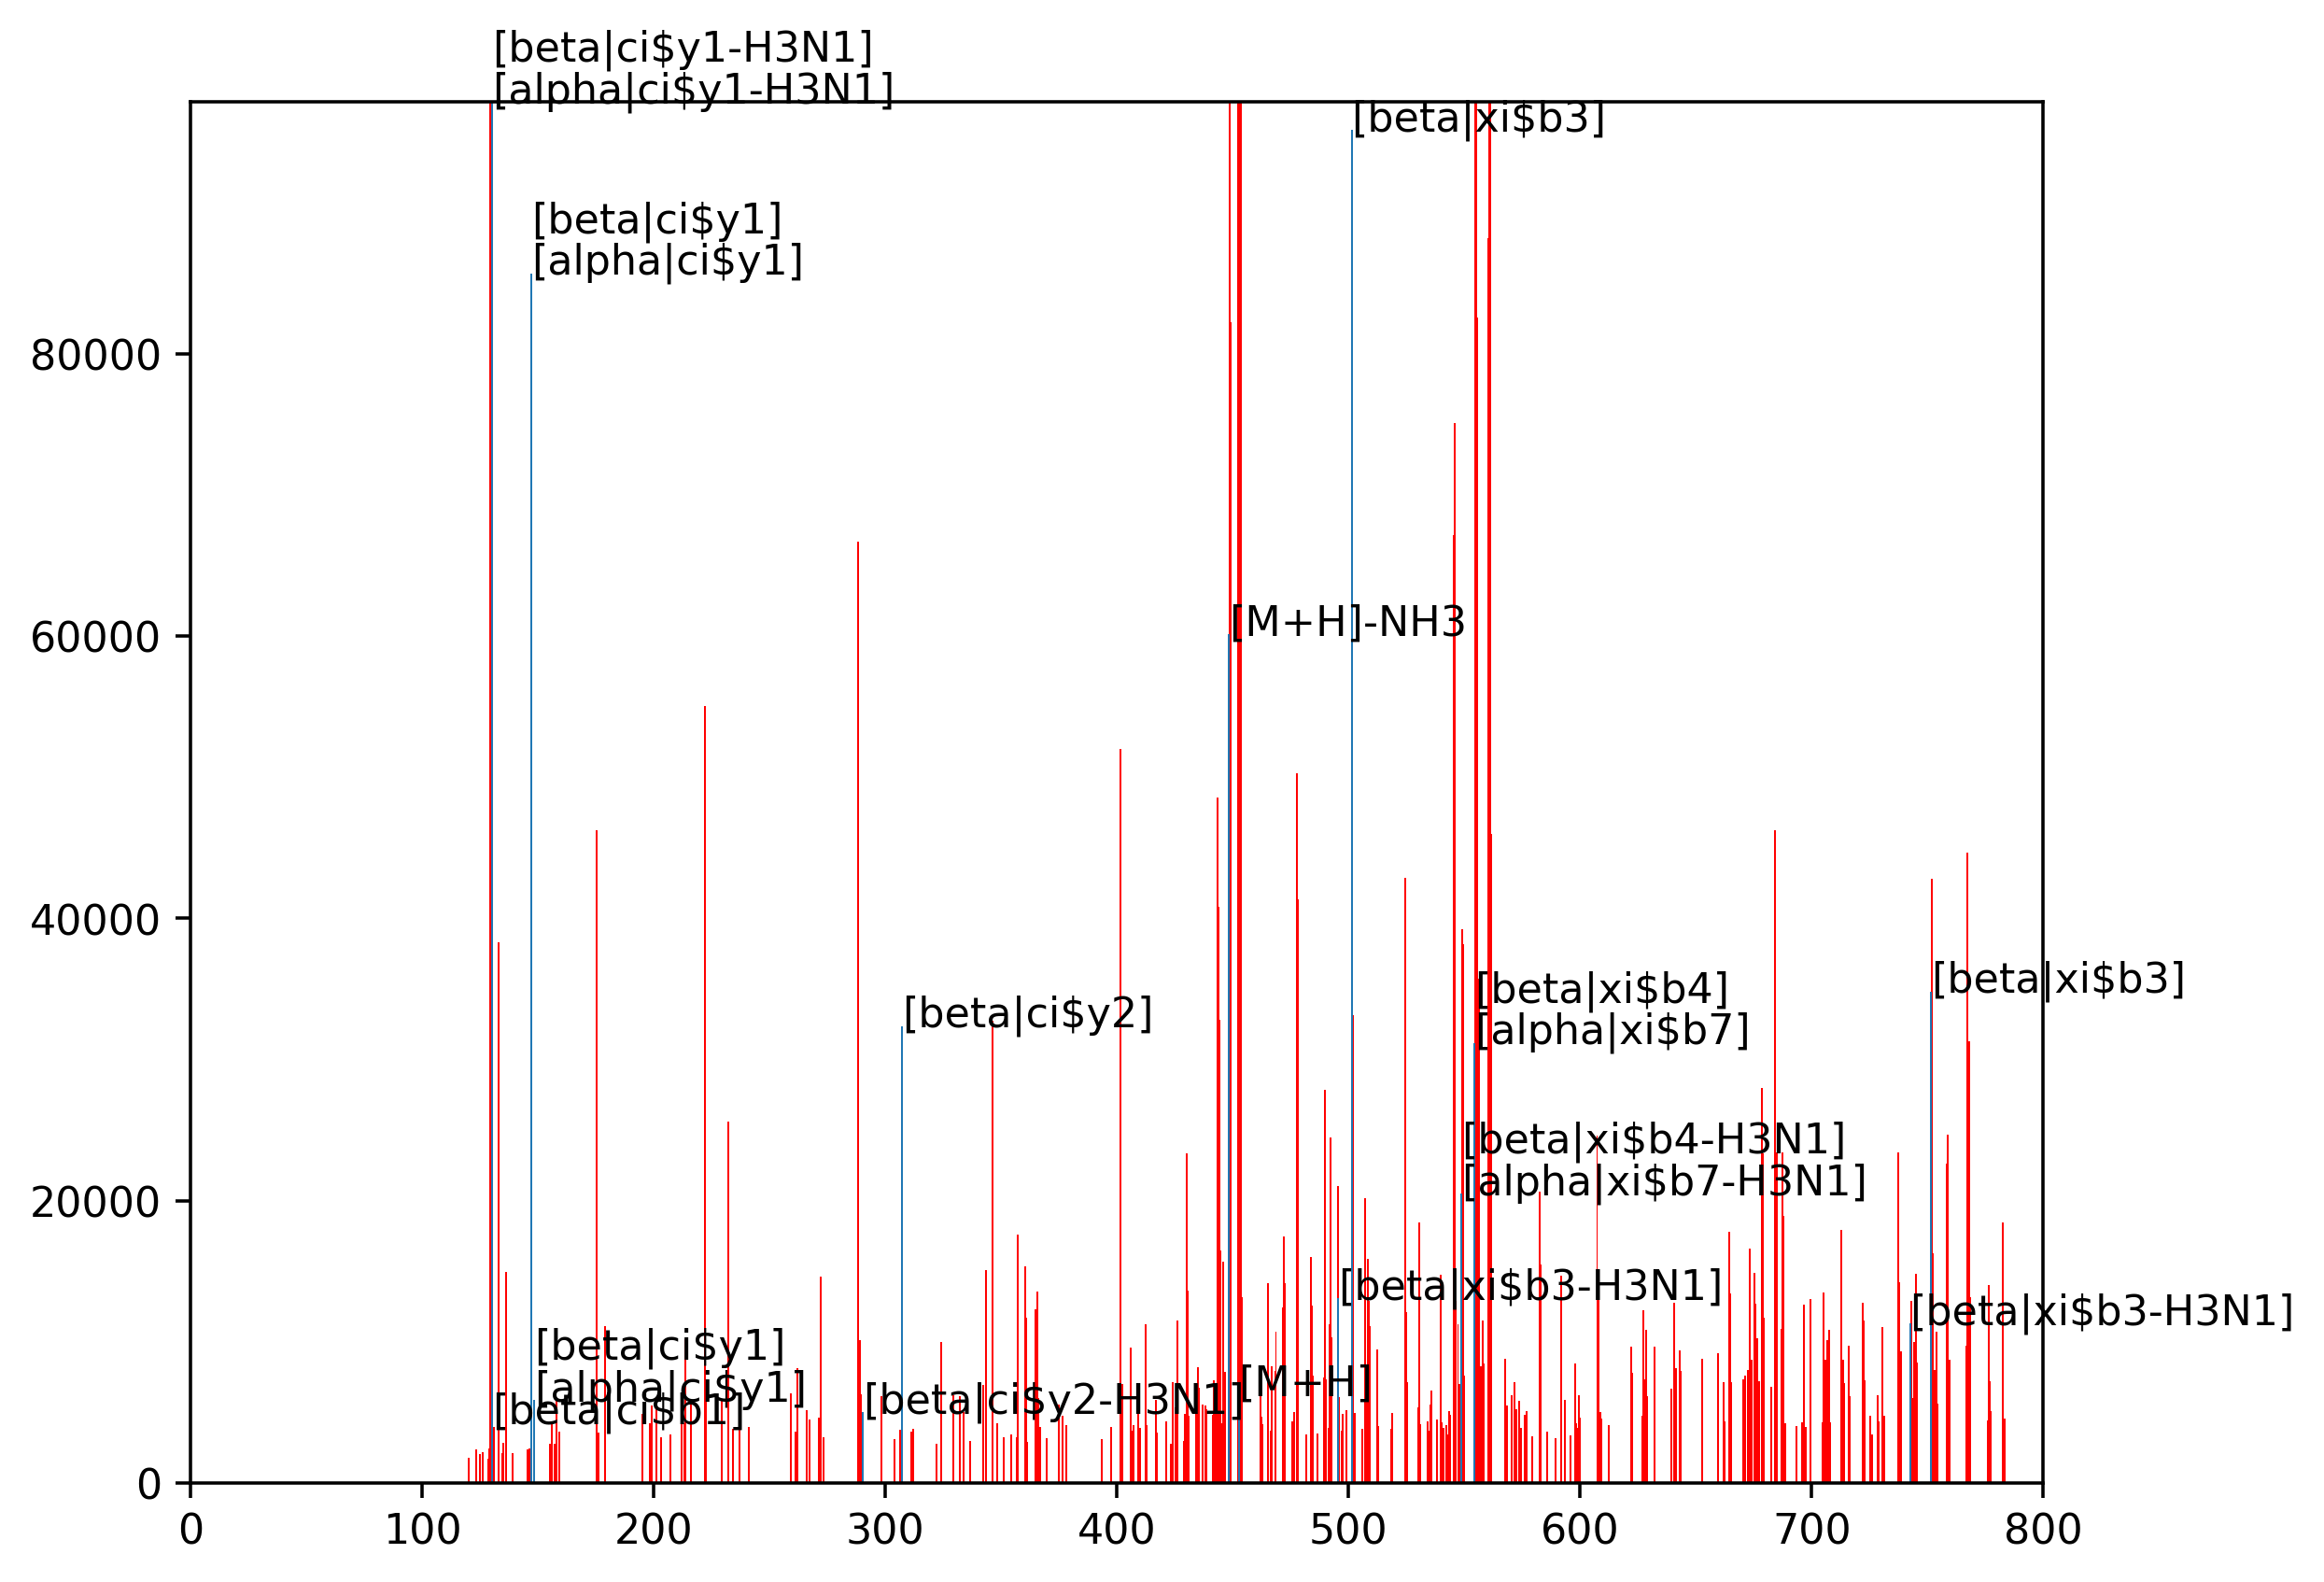

In [260]:
spec_ref = 'controllerType=0 controllerNumber=1 scan=5236'

plt.figure(figsize=[8, 6], dpi=320)
ax = plt.subplot(1, 1, 1)

spec = Spectrum(mzml.find(spec_ref))
spec.plot(ax)

xlms_id = XLMS_id(pepid_high_s2[spec_ref][0])
xlms_id.plot(spec, ax)

             0             1                   2
0   130.050095   4265.267578        [beta|ci$b1]
1   130.086517  97807.601562  [alpha|ci$y1-H3N1]
2   130.086517  97807.601562   [beta|ci$y1-H3N1]
3   147.113159  85678.523438       [alpha|ci$y1]
4   147.113159  85678.523438        [beta|ci$y1]
5   148.116745   5871.193359       [alpha|ci$y1]
6   148.116745   5871.193359        [beta|ci$y1]
7   290.118347   5003.562012   [beta|ci$y2-H3N1]
8   307.144623  32367.666016        [beta|ci$y2]
9   448.244904  60104.292969           [M+H]-NH3
10  452.498657   6232.931152               [M+H]
11  495.280457  13086.640625   [beta|xi$b3-H3N1]
12  501.281708  95832.945312        [beta|xi$b3]
13  548.622498  20491.769531  [alpha|xi$b7-H3N1]
14  548.622498  20491.769531   [beta|xi$b4-H3N1]
15  554.296997  31162.712891       [alpha|xi$b7]
16  554.296997  31162.712891        [beta|xi$b4]
17  742.414673  11273.465820   [beta|xi$b3-H3N1]
18  751.417358  34799.320312        [beta|xi$b3]


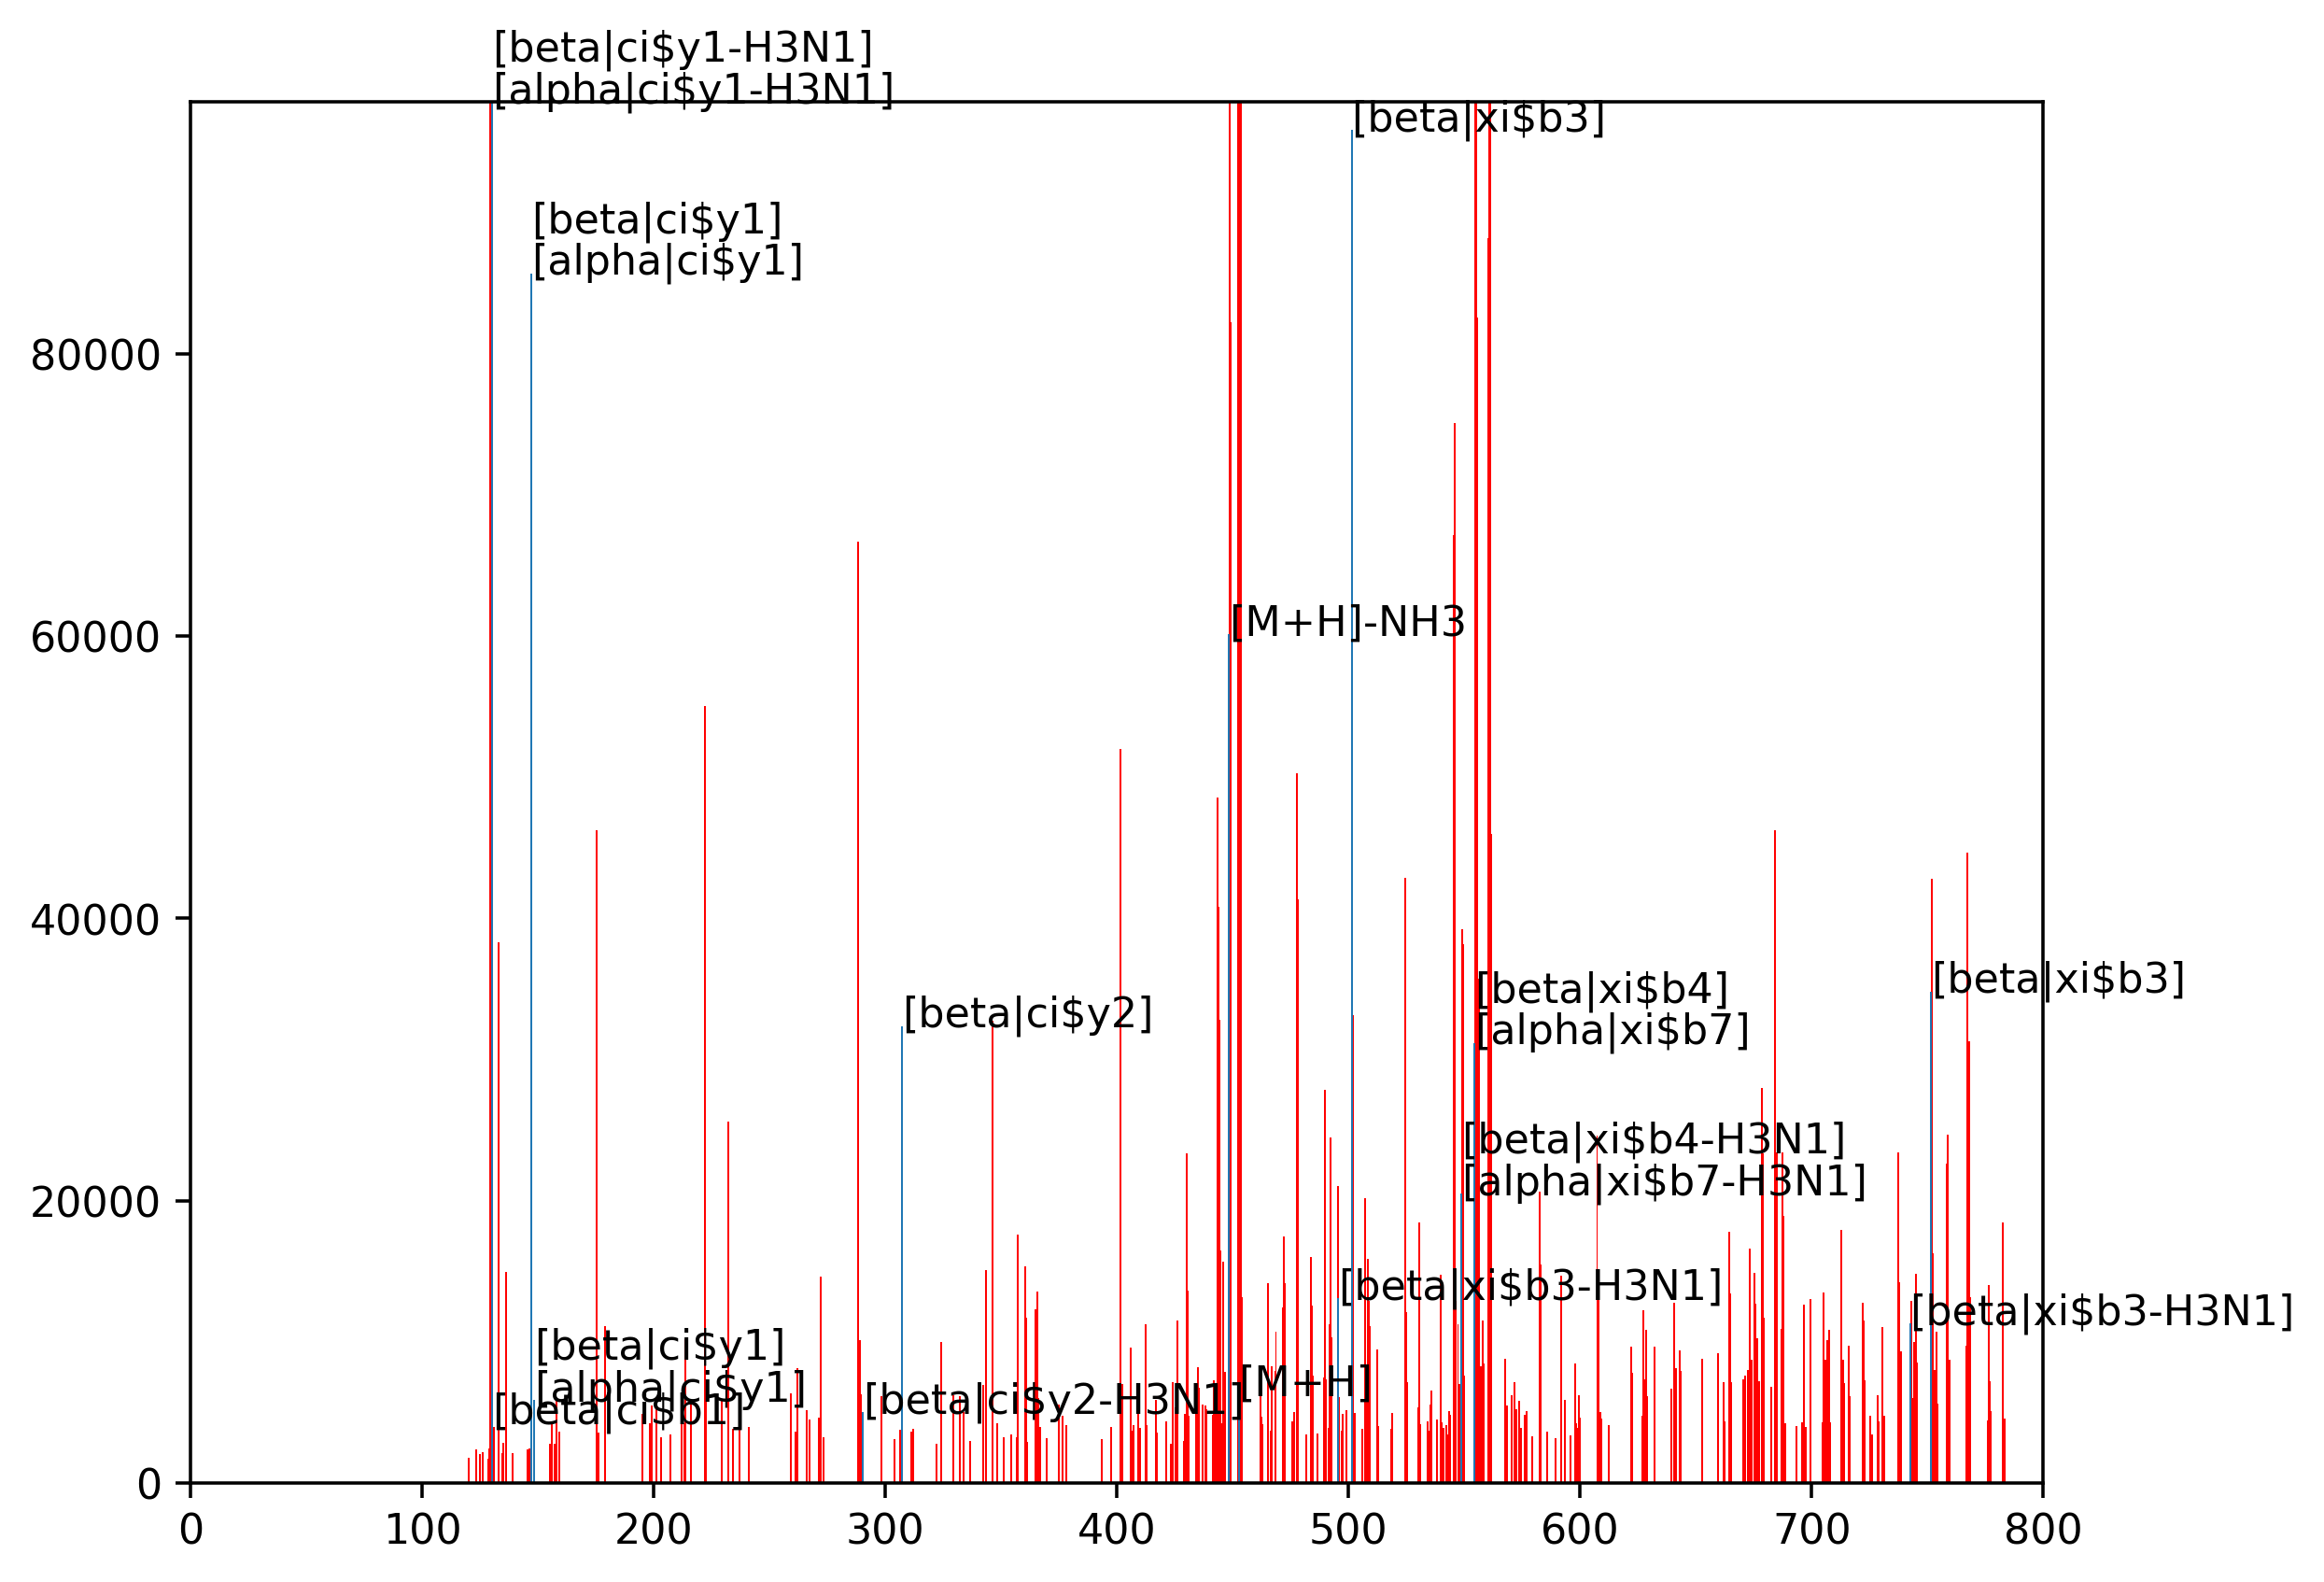

In [276]:
spec_ref = 'controllerType=0 controllerNumber=1 scan=5236'

plt.figure(figsize=[8, 6], dpi=320)
ax = plt.subplot(1, 1, 1)

spec = Spectrum(mzml.find(spec_ref))
spec.plot(ax)

xlms_id = XLMS_id(pepid_high_s2[spec_ref][1])
xlms_id.plot(spec, ax)

In [261]:

xlms_id = XLMS_id(pepid_high_s2[spec_ref][1])
xlms_id.plot(spec, ax)

             0             1                   2
0   130.050095   4265.267578        [beta|ci$b1]
1   130.086517  97807.601562  [alpha|ci$y1-H3N1]
2   130.086517  97807.601562   [beta|ci$y1-H3N1]
3   147.113159  85678.523438       [alpha|ci$y1]
4   147.113159  85678.523438        [beta|ci$y1]
5   148.116745   5871.193359       [alpha|ci$y1]
6   148.116745   5871.193359        [beta|ci$y1]
7   290.118347   5003.562012   [beta|ci$y2-H3N1]
8   307.144623  32367.666016        [beta|ci$y2]
9   448.244904  60104.292969           [M+H]-NH3
10  452.498657   6232.931152               [M+H]
11  495.280457  13086.640625   [beta|xi$b3-H3N1]
12  501.281708  95832.945312        [beta|xi$b3]
13  548.622498  20491.769531  [alpha|xi$b7-H3N1]
14  548.622498  20491.769531   [beta|xi$b4-H3N1]
15  554.296997  31162.712891       [alpha|xi$b7]
16  554.296997  31162.712891        [beta|xi$b4]
17  742.414673  11273.465820   [beta|xi$b3-H3N1]
18  751.417358  34799.320312        [beta|xi$b3]


In [244]:
spec.xml.findall(f'run/spectrumList/spectrum', nsmap)

AttributeError: 'Spectrum' object has no attribute 'xml'

In [ ]:
def 

In [7]:
res = XLMS_res('../results/openpepxllf/alban/20210702_L1_UM5_alban001_SA_EXT00_Ilse_fbn_dss2_450mm.idXML')
res.xml

In [11]:
new_res = XLMS_res.from_old(res)
new_res

In [31]:
root = res.xml
x = root.find('IdentificationRun/PeptideIdentification')

In [127]:
x.find('PeptideHit[1]')

<Element 'PeptideHit' at 0x000001F27FBEA3E0>

In [125]:
x.findall('PeptideHit')

[<Element 'PeptideHit' at 0x000001F27FBEA3E0>,
 <Element 'PeptideHit' at 0x000001F27FBECAE0>]

In [36]:
x.attrib

{'score_type': 'OpenPepXL:score',
 'higher_score_better': 'true',
 'significance_threshold': '0.0',
 'MZ': '655.048889160156023',
 'RT': '756.125406943002076',
 'spectrum_reference': 'controllerType=0 controllerNumber=1 scan=2831'}

## Plot with df

In [ ]:
def plot_df_res(df):
    

## ALott

In [15]:
xlms_res = XLMS_res('../results/openpepxllf/knime4.6/ALott/M_Ninov_ALott_Expl_260620_020720_pSEC_R1_Fr22.idXML')
xlms_res

In [49]:
import xlms
from extract_search_result import load_res
from load_search_result import load_idxmls
import csv

In [50]:
def load_res(name, basedir=''):
    res_csv = f'{basedir}results/info/{name}_res.csv'
    res_csv = csv.DictReader(open(res_csv))
    # data_tab = pd.read_csv(res_csv, index_col=0)
    data_tab = pd.DataFrame(res_csv)
    data_tab = data_tab.set_index('')
    data_tab['xl_rank'] = data_tab['xl_rank'].astype(int)
    data_tab['OpenPepXL:score'] = data_tab['OpenPepXL:score'].astype(float)
    return data_tab


In [51]:
df = load_res('ALott', '../')

In [52]:
df

,score_type,higher_score_better,significance_threshold,MZ,RT,spectrum_reference,xl_chain,xl_pos1,spectrum_index,xl_type,...,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score,accession,is decoy,aa_before,aa_after
,,,,,,,,,,,,,,,,,,,,,
0,OpenPepXL:score,True,0.0,644.3593,2504.3519223423,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,4,5454,cross-link,...,375,211,sp|P0DMV9|HS71B_HUMAN,target,target,0.0,['sp|P0DMV9|HS71B_HUMAN'],False,['R'],['N']
1,OpenPepXL:score,True,0.0,620.383361816406,2505.91807038498,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,2,5458,cross-link,...,591,433,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['R'],['C']
2,OpenPepXL:score,True,0.0,620.383361816406,2505.91807038498,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,2,5458,cross-link,...,591,433,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['C']
3,OpenPepXL:score,True,0.0,620.383361816406,2505.91807038498,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,7,5458,cross-link,...,596,433,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['C']
4,OpenPepXL:score,True,0.0,620.383361816406,2505.91807038498,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,2,5458,cross-link,...,591,590,sp|P0DMV9|HS71B_HUMAN,target,target,0.0,['sp|P0DMV9|HS71B_HUMAN'],False,['K'],['C']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726486,OpenPepXL:score,True,0.0,792.736022949219,1794.0042482109059,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,7,8148,cross-link,...,588,580,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['F']
2726487,OpenPepXL:score,True,0.0,655.6445,1794.469098398208,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002510,2,8150,cross-link,...,260,270,sp|P08238|HS90B_HUMAN,target,target,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['I']
2726488,OpenPepXL:score,True,0.0,655.6445,1794.469098398208,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,7,8150,mono-link,...,265,-,-,target,-,0.0,['sp|P08238|HS90B_HUMAN'],False,['K'],['I']


In [64]:
df = load_idxmls(f'ALott/*.idXML', '../results/openpepxllf/knime4.6/')

../results/openpepxllf/knime4.6/ALott/M_Ninov_ALott_Expl_260620_020720_pSEC_R1_Fr22.idXML


In [68]:
df

,score_type,higher_score_better,significance_threshold,MZ,RT,spectrum_reference,xl_chain,xl_pos1,spectrum_index,xl_type,...,selected,sequence_beta,target_decoy,protein_references,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score
58018,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,25,7627,cross-link,...,false,LIGRKFGDPVVQSDMK,target,unique,295,98,sp|P0DMV9|HS71B_HUMAN,target,target,1.0
58019,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,5,7627,cross-link,...,false,LIGRKFGDPVVQSDMK,target,unique,275,98,sp|P0DMV9|HS71B_HUMAN,target,target,1.0
58020,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,3,7627,cross-link,...,false,LIGRKFGDPVVQSDMK,target,unique,273,98,sp|P0DMV9|HS71B_HUMAN,target,target,1.0
58021,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,21,7627,cross-link,...,false,DAKLYSNRAAC(Carbamidomethyl)YTK,target,unique,55,418,sp|P31948|STIP1_HUMAN,target,target,1.0
58022,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,29,7627,cross-link,...,false,EKGNK,target,unique,241,33,sp|P31948|STIP1_HUMAN,target,target,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58013,OpenPepXL:score,true,0.0,1165.608199999999897,2613.916369268417839,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,7,7626,cross-link,...,false,ILKEQERLAYINPDLALEEKNK,target,unique,123,370,sp|P31948|STIP1_HUMAN,target,target,1.0
58014,OpenPepXL:score,true,0.0,1165.608199999999897,2613.916369268417839,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,22,7626,cross-link,...,false,KGDYQKAYEDGC(Carbamidomethyl)K,target,unique,118,79,sp|P31948|STIP1_HUMAN,target,target,1.0
58015,OpenPepXL:score,true,0.0,1165.608199999999897,2613.916369268417839,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,16,7626,cross-link,...,false,SIYYITGESKEQVANSAFVERVRK,target,unique,664,514,sp|P08238|HS90B_HUMAN,target,target,1.0
58016,OpenPepXL:score,true,0.0,1165.608199999999897,2613.916369268417839,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,16,7626,cross-link,...,false,ILKEQERLAYINPDLALEEKNK,target,unique,132,370,sp|P31948|STIP1_HUMAN,target,target,1.0


In [65]:
g = df.groupby('spectrum_reference')

In [66]:
g.apply(remove_dup_pep)

score_type  \
spectrum_reference                                                          
file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_F... 58018  OpenPepXL:score   
                                                   58021  OpenPepXL:score   
                                                   58022  OpenPepXL:score   
                                                   58023  OpenPepXL:score   
                                                   58025  OpenPepXL:score   
...                                                                   ...   
file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_F... 58011  OpenPepXL:score   
                                                   58012  OpenPepXL:score   
                                                   58013  OpenPepXL:score   
                                                   58015  OpenPepXL:score   
                                                   58017  OpenPepXL:score   

                                                         higher_score_better  \
spectrum_reference                                                             
file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_F... 58018                true   
                                                   58021                true   
                                                   58022                true   
                                                   58023                true   
                                                   58025                true   
...                                                                      ...   
file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_F... 58011                true   
                                                   58012                true   
                                                   58013                true   
                                                   58015                true   
                                                   58017                true   

                                                         significance_threshold  \
spectrum_reference                                                                
file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_F... 58018                    0.0   
                                                   58021                    0.0   
                                                   58022                    0.0   
                                                   58023                    0.0   
                                                   58025                    0.0   
...                                                                         ...   
file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_F... 58011                    0.0   
                                                   58012                    0.0   
                                                   58013                    0.0   
                                                   58015                    0.0   
                                                   58017                    0.0   

                                                                            MZ  \
spectrum_reference                                                               
file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_F... 58018   802.401306152343977   
                                                   58021   802.401306152343977   
                                                   58022   802.401306152343977   
                                                   58023   802.401306152343977   
                                                   58025   802.401306152343977   
...                                                                        ...   
file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_F... 58011  1165.608199999999897   
                                                   58012  1165.608199999999897   
                                                   58013  1165.608199999999897   
                                      

In [74]:
nodup = g.apply(remove_dup_pep)
nodup.reset_index(drop = True, inplace = True)
nodup

,score_type,higher_score_better,significance_threshold,MZ,RT,spectrum_reference,xl_chain,xl_pos1,spectrum_index,xl_type,...,selected,sequence_beta,target_decoy,protein_references,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score
0,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,25,7627,cross-link,...,false,LIGRKFGDPVVQSDMK,target,unique,295,98,sp|P0DMV9|HS71B_HUMAN,target,target,1.0
1,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,21,7627,cross-link,...,false,DAKLYSNRAAC(Carbamidomethyl)YTK,target,unique,55,418,sp|P31948|STIP1_HUMAN,target,target,1.0
2,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,29,7627,cross-link,...,false,EKGNK,target,unique,241,33,sp|P31948|STIP1_HUMAN,target,target,1.0
3,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,21,7627,cross-link,...,false,SKLTFSC(Carbamidomethyl)LGGSDNFK,target,unique,55,41,sp|Q15185|TEBP_HUMAN,target,target,1.0
4,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,15,7627,cross-link,...,false,KM(Oxidation)EESKAKFENLC(Carbamidomethyl)K,target,unique,646,580,sp|P08238|HS90B_HUMAN,target,target,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43306,OpenPepXL:score,true,0.0,1165.608199999999897,2613.916369268417839,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,34,7626,cross-link,...,false,KGDYQKAYEDGC(Carbamidomethyl)K,target,unique,130,79,sp|P31948|STIP1_HUMAN,target,target,1.0
43307,OpenPepXL:score,true,0.0,1165.608199999999897,2613.916369268417839,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,30,7626,cross-link,...,false,HLNEIDLFHC(Carbamidomethyl)IDPNDSKHK,target,unique,436,71,sp|Q15185|TEBP_HUMAN,target,target,1.0
43308,OpenPepXL:score,true,0.0,1165.608199999999897,2613.916369268417839,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,7,7626,cross-link,...,false,ILKEQERLAYINPDLALEEKNK,target,unique,123,370,sp|P31948|STIP1_HUMAN,target,target,1.0
43309,OpenPepXL:score,true,0.0,1165.608199999999897,2613.916369268417839,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,16,7626,cross-link,...,false,SIYYITGESKEQVANSAFVERVRK,target,unique,664,514,sp|P08238|HS90B_HUMAN,target,target,1.0


In [76]:
top2 = nodup.groupby('spectrum_reference').apply(lambda g: g.iloc[:2])
top2.reset_index(drop = True, inplace = True)
top2

,score_type,higher_score_better,significance_threshold,MZ,RT,spectrum_reference,xl_chain,xl_pos1,spectrum_index,xl_type,...,selected,sequence_beta,target_decoy,protein_references,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score
0,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,25,7627,cross-link,...,false,LIGRKFGDPVVQSDMK,target,unique,295,98,sp|P0DMV9|HS71B_HUMAN,target,target,1.0
1,OpenPepXL:score,true,0.0,802.401306152343977,2614.178996393201942,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,21,7627,cross-link,...,false,DAKLYSNRAAC(Carbamidomethyl)YTK,target,unique,55,418,sp|P31948|STIP1_HUMAN,target,target,1.0
2,OpenPepXL:score,true,0.0,943.128662109375,2614.703935453415852,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,10,7629,cross-link,...,false,YKAEDEVQR,target,unique,143,547,sp|P0DMV9|HS71B_HUMAN,target,target,1.0
3,OpenPepXL:score,true,0.0,943.128662109375,2614.703935453415852,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,0,7629,cross-link,...,false,QKAEADK,target,non-unique,"1,1",664,sp|P08238|HS90B_HUMAN,target,target,1.0
4,OpenPepXL:score,true,0.0,1061.148599999999988,2615.040561267851899,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,3,7630,cross-link,...,false,VTSKC(Carbamidomethyl)GSLGNIHHKPGGGQVEVK,target,unique,382,331,sp|P10636|TAU_HUMAN,target,target,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14982,OpenPepXL:score,true,0.0,975.340881347656023,2613.391121217725868,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,2,7624,cross-link,...,false,KGESGQSWPRLTK,target,unique,369,85,sp|Q15185|TEBP_HUMAN,target,target,1.0
14983,OpenPepXL:score,true,0.0,940.295532226562955,2613.653747388839747,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,14,7625,cross-link,...,false,AQALRDNSTM(Oxidation)GYM(Oxidation)M(Oxidation...,target,unique,438,646,sp|P08238|HS90B_HUMAN,target,target,1.0
14984,OpenPepXL:score,true,0.0,940.295532226562955,2613.653747388839747,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,8,7625,cross-link,...,false,KAAALEAM(Oxidation)KDYTKAM(Oxidation)DVYQK,target,unique,24,469,sp|P31948|STIP1_HUMAN,target,target,1.0
14985,OpenPepXL:score,true,0.0,1165.608199999999897,2613.916369268417839,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,8,7626,cross-link,...,false,HYDKAK,target,unique,192,273,sp|P31948|STIP1_HUMAN,target,target,1.0


In [80]:
high_s2 = top2.groupby('spectrum_reference').apply(lambda g: g if len(g) >= 2 and g.iloc[1]['OpenPepXL:score'] * 300 >= 180 else None)
high_s2.reset_index(drop = True, inplace = True)
high_s2

,score_type,higher_score_better,significance_threshold,MZ,RT,spectrum_reference,xl_chain,xl_pos1,spectrum_index,xl_type,...,selected,sequence_beta,target_decoy,protein_references,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score
0,OpenPepXL:score,true,0.0,956.20150000000001,671.234574386598069,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,10,776,cross-link,...,false,EVVKK,target,unique,257,226,sp|P08238|HS90B_HUMAN,target,target,1.0
1,OpenPepXL:score,true,0.0,956.20150000000001,671.234574386598069,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,10,776,cross-link,...,false,KVLDK,target,unique,257,590,sp|P0DMV9|HS71B_HUMAN,target,target,1.0
2,OpenPepXL:score,true,0.0,765.162719726562955,687.471920320512027,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,10,833,cross-link,...,false,KVLDK,target,unique,257,590,sp|P0DMV9|HS71B_HUMAN,target,target,1.0
3,OpenPepXL:score,true,0.0,765.162719726562955,687.471920320512027,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,10,833,cross-link,...,false,EVVKK,target,unique,257,226,sp|P08238|HS90B_HUMAN,target,target,1.0
4,OpenPepXL:score,true,0.0,862.057373046875,750.874579259874054,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,10,1059,cross-link,...,false,AQALRDNSTM(Oxidation)GYMM(Oxidation)AKK,target,unique,257,646,sp|P08238|HS90B_HUMAN,target,target,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,OpenPepXL:score,true,0.0,1210.385199999999941,1985.837503263473991,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,19,5426,mono-link,...,false,-,target,unique,87,-,-,target,-,0.0
64,OpenPepXL:score,true,0.0,1642.583100000000059,2133.946664402009901,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,19,5942,cross-link,...,false,AAALEAM(Oxidation)KDYTKAM(Oxidation)DVYQK,target,unique,87,469,sp|P31948|STIP1_HUMAN,target,target,1.0
65,OpenPepXL:score,true,0.0,1642.583100000000059,2133.946664402009901,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,19,5942,cross-link,...,false,IM(Oxidation)KAQALRDNSTMGYMMAK,target,unique,87,630,sp|P08238|HS90B_HUMAN,target,target,1.0
66,OpenPepXL:score,true,0.0,1008.630899999999997,2346.022415229797843,file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_...,MS:1002509,0,6681,cross-link,...,false,KELEQVC(Carbamidomethyl)NPIISGLYQGAGGPGPGGFGAQGPK,target,unique,1,618,sp|P0DMV9|HS71B_HUMAN,target,target,1.0


In [81]:
def remove_dup_pep(g):
    return g.drop_duplicates(['sequence', 'sequence_beta'])
    

In [86]:
mzml = mzML('../spec/ALott/M_Ninov_ALott_Expl_260620_020720_pSEC_R1_Fr22.mzML')
mzml

[Warning] Not index found and build_index_from_scratch is False


In [83]:
spec_ref = high_s2.iloc[0]['spectrum_reference']
spec_ref

'file=M_Ninov_ALott_Expl_260620_020720_pSEC_R1_Fr22.idXML scan=2464'

In [91]:
high_s2[['xl_rank', 'sequence', 'sequence_beta']]

,xl_rank,sequence,sequence_beta
0,1,EISDDEAEEEKGEKEEEDKDDEEKPK,EVVKK
1,2,EISDDEAEEEKGEKEEEDKDDEEKPK,KVLDK
2,1,EISDDEAEEEKGEKEEEDKDDEEKPK,KVLDK
3,2,EISDDEAEEEKGEKEEEDKDDEEKPK,EVVKK
4,1,EISDDEAEEEKGEKEEEDKDDEEKPK,AQALRDNSTM(Oxidation)GYMM(Oxidation)AKK
...,...,...,...
63,2,STPTAEDVTAPLVDEGAPGK(Xlink:DSS[156])QAAAQPHTEI...,-
64,1,STPTAEDVTAPLVDEGAPGKQAAAQPHTEIPEGTTAEEAGIGDTPS...,AAALEAM(Oxidation)KDYTKAM(Oxidation)DVYQK
65,3,STPTAEDVTAPLVDEGAPGKQAAAQPHTEIPEGTTAEEAGIGDTPS...,IM(Oxidation)KAQALRDNSTMGYMMAK
66,1,MGSSHHHHHHSSGLVPRGSHM(Oxidation)ASM(Oxidation)...,KELEQVC(Carbamidomethyl)NPIISGLYQGAGGPGPGGFGAQGPK


              0             1                    2
0    130.086212   2594.023438   [alpha|ci$y1-H3N1]
1    130.086212   2594.023438    [beta|ci$y1-H3N1]
2    147.112671   6351.116211        [alpha|ci$y1]
3    147.112671   6351.116211         [beta|ci$y1]
4    243.135391    568.337097        [alpha|ci$b2]
5    244.165649  26264.248047        [alpha|ci$y2]
6    245.169739   2648.971436        [alpha|ci$y2]
7    372.260529   4180.717285        [alpha|ci$y3]
8    373.264099    676.379822        [alpha|ci$y3]
9    494.751099   2937.376953        [alpha|ci$y8]
10   495.252197   1308.903198        [alpha|ci$y8]
11   501.303375   1962.345093        [alpha|ci$y4]
12   502.307526    738.176270        [alpha|ci$y4]
13   542.211182    501.175201   [alpha|ci$b5-H2O1]
14   552.266235   2140.084717        [alpha|ci$y9]
15   552.768005    728.145142        [alpha|ci$y9]
16   630.347046   3064.094971        [alpha|ci$y5]
17   681.305847   1606.548706       [alpha|ci$y11]
18   681.805054    725.764771  

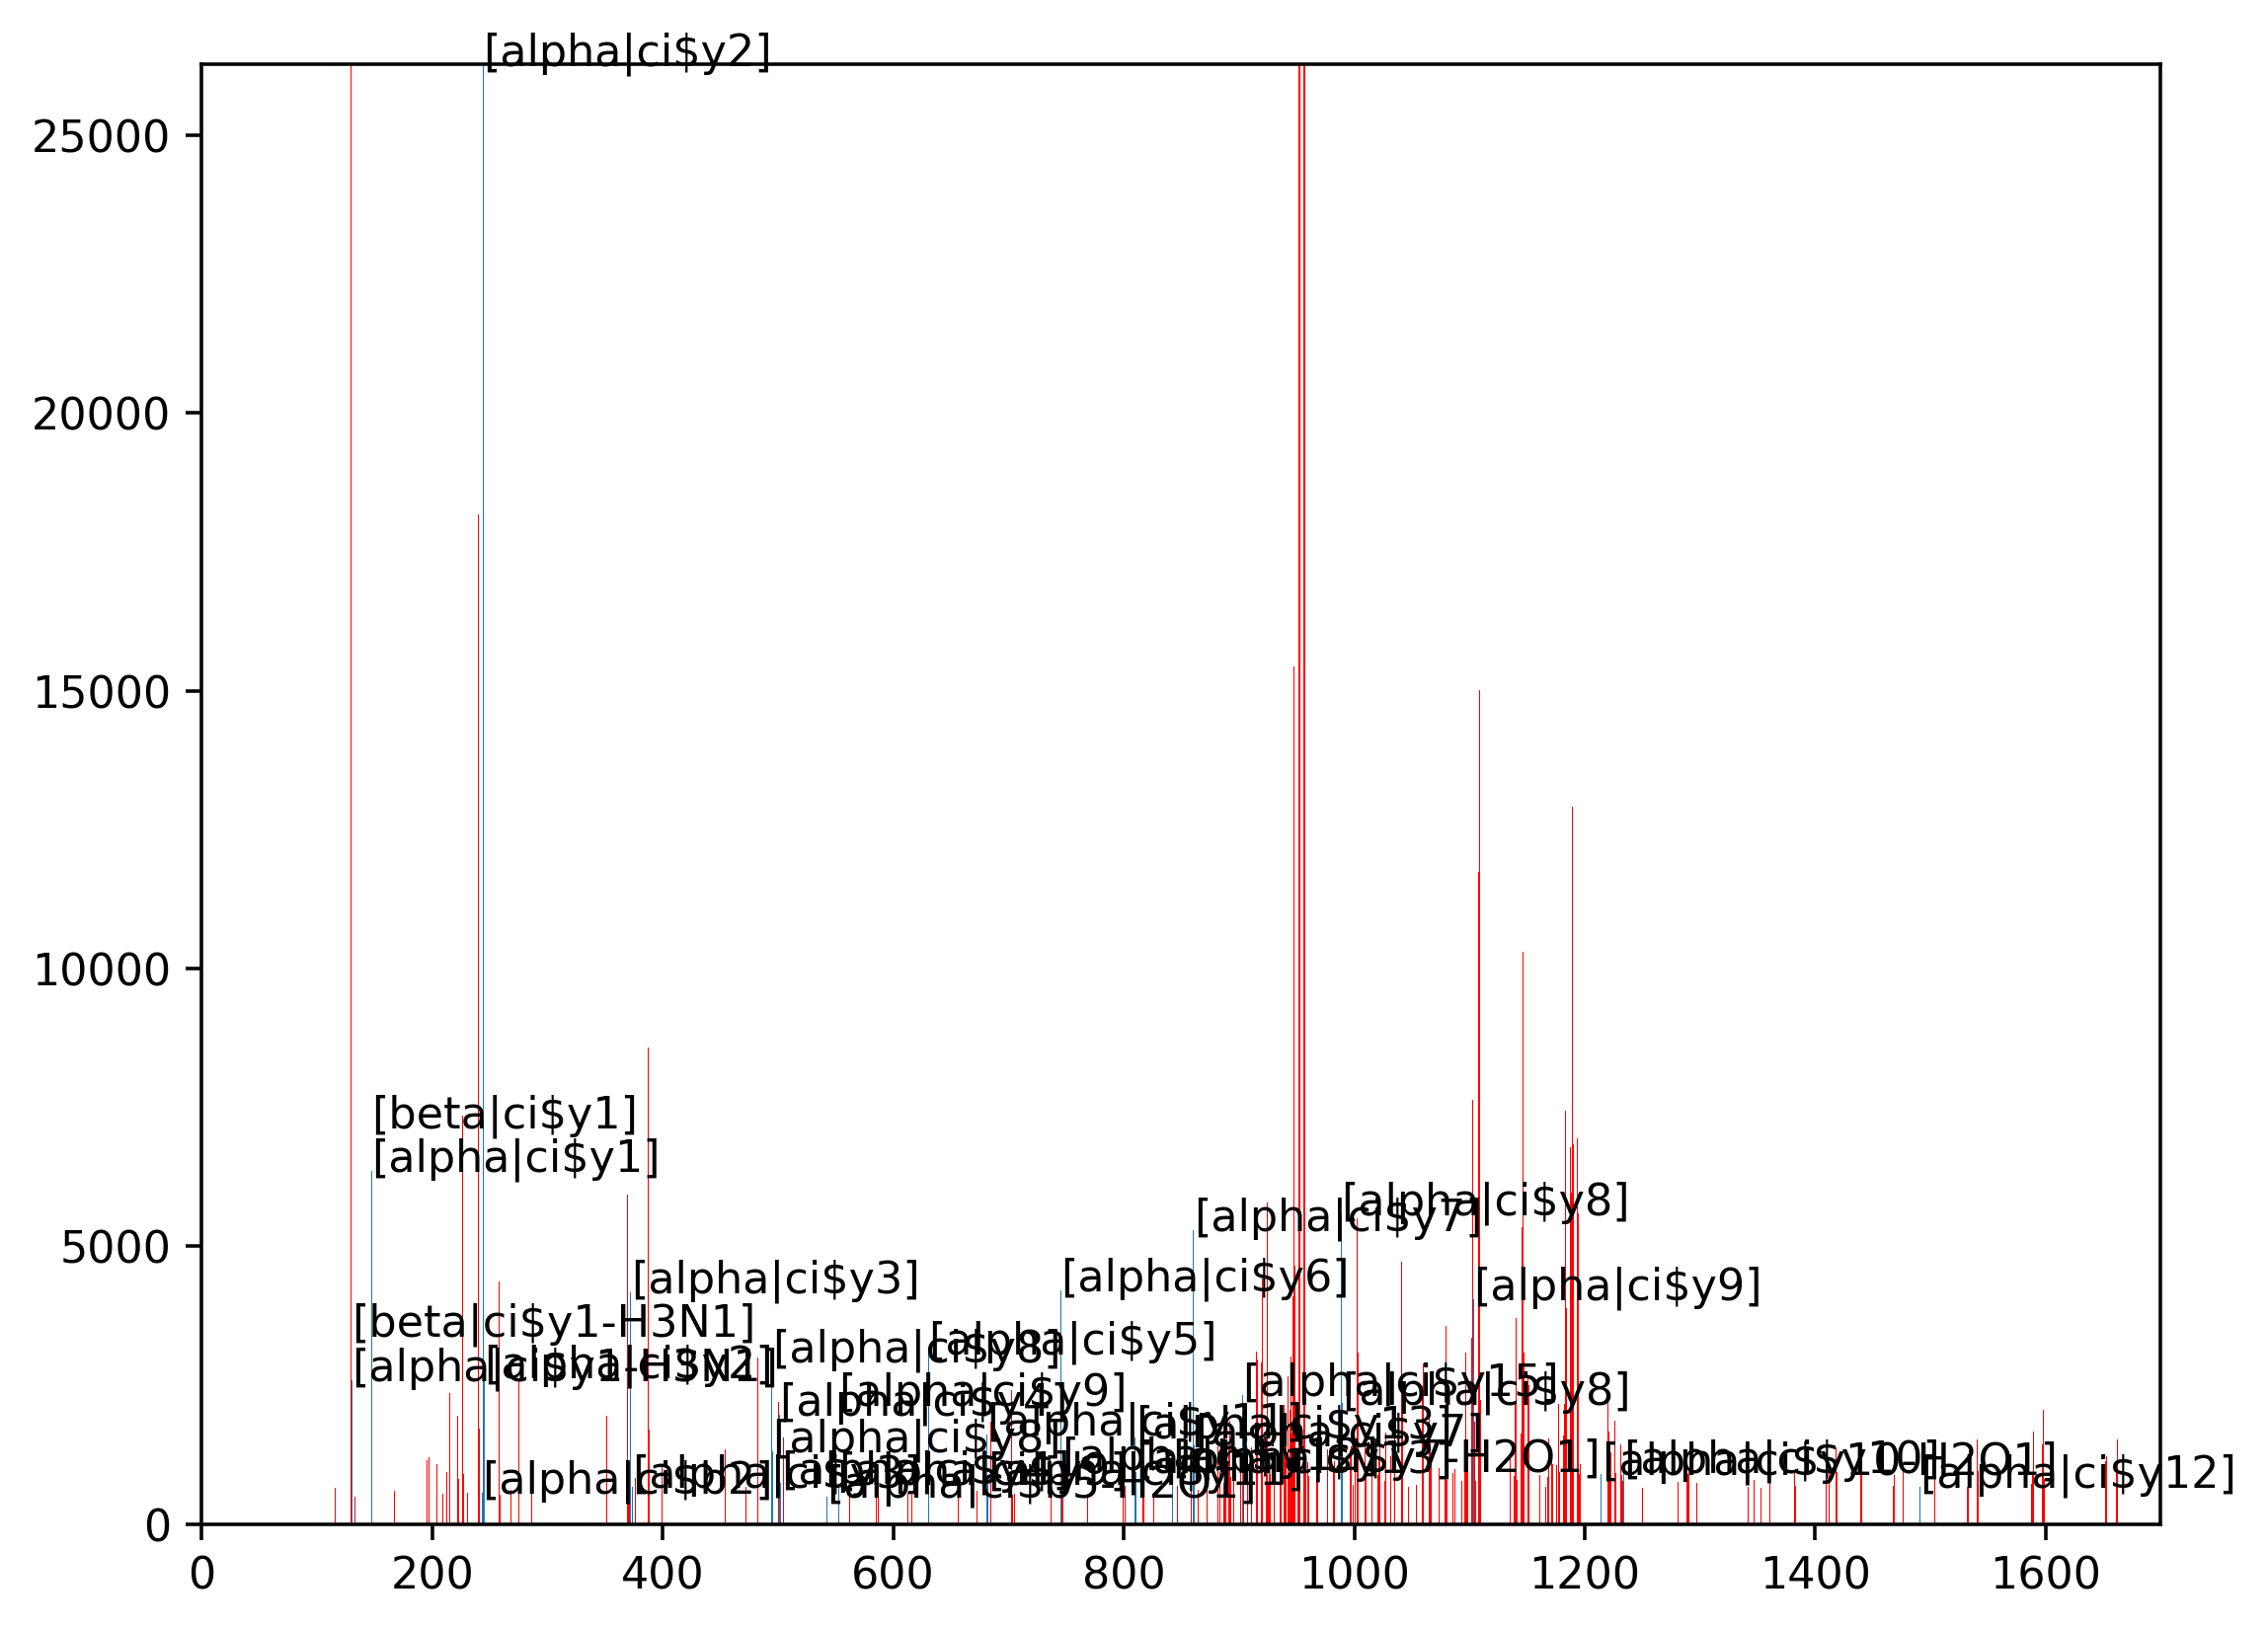

In [90]:
i = 0

spec_ref = high_s2.iloc[i]['spectrum_reference']

spec_ref = f'controllerType=0 controllerNumber=1 {spec_ref.split()[1]}'

plt.figure(figsize=[8, 6], dpi=320)
ax = plt.subplot(1, 1, 1)

spec = Spectrum(mzml.find(spec_ref))
spec.plot(1700, ax)

spec.plot_ann(high_s2.iloc[i]['fragment_annotation'], ax)
# xlms_id = XLMS_id(pepid_high_s2[spec_ref][0])
# xlms_id.plot(spec, ax)

## Find Spec with dup

### ecoli_xl

In [93]:
df = load_idxmls(f'ecoli_xl/*.idXML', '../results/openpepxllf/knime4.6/')

../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF10.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF1_101012172356.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF2.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF3.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF4.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF5.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF6.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF7.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF8.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LEF9.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_LE_1and2rejected.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092010exp2_WD_1and2rejected.idXML
../results/openpepxllf/knime4.6/ecoli_xl/DESTRibo_092210exp2_LEF1.idXML
../results/openpepxllf/kni

In [94]:
df

,score_type,higher_score_better,significance_threshold,MZ,RT,spectrum_reference,xl_chain,xl_pos1,spectrum_index,xl_type,...,sequence_beta,target_decoy,protein_references,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score,xl_mod
0,OpenPepXL:score,true,0.0,426.238403320313012,3846.603199999997742,file=DESTRibo_092010exp2_LEF10.idXML scan=3223,MS:1002509,7,45,mono-link,...,-,target,unique,78,-,-,target,-,0.0,NaN
1,OpenPepXL:score,true,0.0,338.804700000000025,3938.11409999999978,file=DESTRibo_092010exp2_LEF10.idXML scan=3285,MS:1002509,0,68,cross-link,...,IKTVR,target,unique,1,5,sp|P0A7Q1|RL35_ECOLI,target,target,1.0,DSS
2,OpenPepXL:score,true,0.0,338.804700000000025,3938.11409999999978,file=DESTRibo_092010exp2_LEF10.idXML scan=3285,MS:1002509,0,68,cross-link,...,LKLSR,target,unique,1,10,sp|P0A7V8|RS4_ECOLI,target,target,1.0,DSS
3,OpenPepXL:score,true,0.0,338.804700000000025,3938.11409999999978,file=DESTRibo_092010exp2_LEF10.idXML scan=3285,MS:1002509,4,68,cross-link,...,SKRGM(Oxidation)R,target,unique,120,12,sp|P0A7N4|RL32_ECOLI,target,target,1.0,DSS
4,OpenPepXL:score,true,0.0,338.804700000000025,3938.11409999999978,file=DESTRibo_092010exp2_LEF10.idXML scan=3285,MS:1002509,9,68,mono-link,...,-,target,unique,10,-,-,target,-,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50245,OpenPepXL:score,true,0.0,452.261169433593977,2540.009500000001935,file=DESTRibo_noLEFwo2+_071510.idXML scan=979,MS:1002509,7,272,mono-link,...,-,target,unique,29,-,-,target,-,0.0,NaN
50246,OpenPepXL:score,true,0.0,452.261169433593977,2540.009500000001935,file=DESTRibo_noLEFwo2+_071510.idXML scan=979,MS:1002509,6,272,mono-link,...,-,target,unique,28,-,-,target,-,0.0,NaN
50247,OpenPepXL:score,true,0.0,352.933197021483977,2561.170399999998153,file=DESTRibo_noLEFwo2+_071510.idXML scan=989,MS:1002509,5,280,mono-link,...,-,target,unique,144,-,-,target,-,0.0,NaN
50248,OpenPepXL:score,true,0.0,352.933197021483977,2561.170399999998153,file=DESTRibo_noLEFwo2+_071510.idXML scan=989,MS:1002509,5,280,mono-link,...,-,target,unique,144,-,-,target,-,0.0,NaN


In [102]:
(df.groupby('spectrum_reference')['spectrum_reference'].count() > 1).sum()

8461

In [100]:
(df.groupby('spectrum_reference')['spectrum_reference'].count() == 1).sum()

3983

In [96]:
def sigle_left_after_remove_dup(df):
    if len(df) == 1:
        return None
    df = remove_dup_pep(df)
    if len(df) > 1:
        return None
    return df

In [97]:
spec_wdup = df.groupby('spectrum_reference').apply(sigle_left_after_remove_dup)
spec_wdup.reset_index(drop = True, inplace = True)
spec_wdup

,score_type,higher_score_better,significance_threshold,MZ,RT,spectrum_reference,xl_chain,xl_pos1,spectrum_index,xl_type,...,sequence_beta,target_decoy,protein_references,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score,xl_mod
0,OpenPepXL:score,true,0.0,401.058380126953011,4753.133200000002034,file=DESTRibo_092010exp2_LEF10.idXML scan=3910,MS:1002509,0,282,cross-link,...,VKIVKFR,target,unique,70,76,sp|P0AG48|RL21_ECOLI,target,target,1.0,DSS
1,OpenPepXL:score,true,0.0,457.696500000000015,4837.013200000002143,file=DESTRibo_092010exp2_LEF10.idXML scan=3987,MS:1002509,0,301,cross-link,...,KATKRK,target,unique,54,36,sp|P0A7Q1|RL35_ECOLI,target,target,1.0,DSS
2,OpenPepXL:score,true,0.0,917.176100000000019,6466.539199999980156,file=DESTRibo_092010exp2_LEF10.idXML scan=5286,MS:1002509,0,719,mono-link,...,-,target,unique,1,-,-,target,-,0.0,unknown mono-link DSS mass 156.078644309999987
3,OpenPepXL:score,true,0.0,422.022299999999973,6516.753300000000309,file=DESTRibo_092010exp2_LEF10.idXML scan=5336,MS:1002509,3,728,cross-link,...,GKKTR,target,unique,49,255,sp|P60422|RL2_ECOLI,target,target,1.0,DSS
4,OpenPepXL:score,true,0.0,428.252900000000011,2169.506200000002082,file=DESTRibo_092010exp2_LEF1_101012172356.idX...,MS:1002509,2,31,cross-link,...,MAKAPIR,target,unique,3,1,sp|P0A7R9|RS11_ECOLI,target,target,1.0,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,OpenPepXL:score,true,0.0,776.101400000000012,5474.489500000002408,file=DESTRibo_noLEFwo2+_071510.idXML scan=2439,MS:1002509,0,1366,cross-link,...,KPLRTWSR,target,unique,1,29,sp|P0A7U3|RS19_ECOLI,target,target,1.0,DSS
653,OpenPepXL:score,true,0.0,945.232300000000009,6145.445099999999911,file=DESTRibo_noLEFwo2+_071510.idXML scan=2776,MS:1002509,5,1618,cross-link,...,M(Oxidation)AKLHDYYKDEVVK,target,unique,43,3,sp|P62399|RL5_ECOLI,target,target,1.0,DSS
654,OpenPepXL:score,true,0.0,872.715799999999945,6254.450400000000627,file=DESTRibo_noLEFwo2+_071510.idXML scan=2831,MS:1002509,6,1659,cross-link,...,QSMKAREVKR,target,unique,108,12,sp|P0AG59|RS14_ECOLI,target,target,1.0,DSS
655,OpenPepXL:score,true,0.0,818.109100000000012,7658.219699999999648,file=DESTRibo_noLEFwo2+_071510.idXML scan=3579,MS:1002509,0,2159,mono-link,...,-,target,unique,1,-,-,target,-,0.0,unknown mono-link DSS mass 156.078644309999987


In [101]:
spec_wdup.groupby('spectrum_reference').count()

,score_type,higher_score_better,significance_threshold,MZ,RT,xl_chain,xl_pos1,spectrum_index,xl_type,xl_rank,...,sequence_beta,target_decoy,protein_references,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score,xl_mod
spectrum_reference,,,,,,,,,,,,,,,,,,,,,
file=DESTRibo_092010exp2_LEF10.idXML scan=3910,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
file=DESTRibo_092010exp2_LEF10.idXML scan=3987,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
file=DESTRibo_092010exp2_LEF10.idXML scan=5286,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
file=DESTRibo_092010exp2_LEF10.idXML scan=5336,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
file=DESTRibo_092010exp2_LEF1_101012172356.idXML scan=1750,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
file=DESTRibo_noLEFwo2+_071510.idXML scan=2439,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
file=DESTRibo_noLEFwo2+_071510.idXML scan=2776,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
file=DESTRibo_noLEFwo2+_071510.idXML scan=2831,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [103]:
nodup = df.groupby('spectrum_reference').apply(remove_dup_pep)
nodup.reset_index(drop = True, inplace = True)
nodup

,score_type,higher_score_better,significance_threshold,MZ,RT,spectrum_reference,xl_chain,xl_pos1,spectrum_index,xl_type,...,sequence_beta,target_decoy,protein_references,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score,xl_mod
0,OpenPepXL:score,true,0.0,426.238403320313012,3846.603199999997742,file=DESTRibo_092010exp2_LEF10.idXML scan=3223,MS:1002509,7,45,mono-link,...,-,target,unique,78,-,-,target,-,0.0,NaN
1,OpenPepXL:score,true,0.0,338.804700000000025,3938.11409999999978,file=DESTRibo_092010exp2_LEF10.idXML scan=3285,MS:1002509,0,68,cross-link,...,IKTVR,target,unique,1,5,sp|P0A7Q1|RL35_ECOLI,target,target,1.0,DSS
2,OpenPepXL:score,true,0.0,338.804700000000025,3938.11409999999978,file=DESTRibo_092010exp2_LEF10.idXML scan=3285,MS:1002509,0,68,cross-link,...,LKLSR,target,unique,1,10,sp|P0A7V8|RS4_ECOLI,target,target,1.0,DSS
3,OpenPepXL:score,true,0.0,338.804700000000025,3938.11409999999978,file=DESTRibo_092010exp2_LEF10.idXML scan=3285,MS:1002509,4,68,cross-link,...,SKRGM(Oxidation)R,target,unique,120,12,sp|P0A7N4|RL32_ECOLI,target,target,1.0,DSS
4,OpenPepXL:score,true,0.0,338.804700000000025,3938.11409999999978,file=DESTRibo_092010exp2_LEF10.idXML scan=3285,MS:1002509,9,68,mono-link,...,-,target,unique,10,-,-,target,-,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38856,OpenPepXL:score,true,0.0,452.261169433593977,2540.009500000001935,file=DESTRibo_noLEFwo2+_071510.idXML scan=979,MS:1002509,7,272,mono-link,...,-,target,unique,29,-,-,target,-,0.0,NaN
38857,OpenPepXL:score,true,0.0,452.261169433593977,2540.009500000001935,file=DESTRibo_noLEFwo2+_071510.idXML scan=979,MS:1002509,6,272,mono-link,...,-,target,unique,28,-,-,target,-,0.0,NaN
38858,OpenPepXL:score,true,0.0,352.933197021483977,2561.170399999998153,file=DESTRibo_noLEFwo2+_071510.idXML scan=989,MS:1002509,5,280,mono-link,...,-,target,unique,144,-,-,target,-,0.0,NaN
38859,OpenPepXL:score,true,0.0,352.933197021483977,2561.170399999998153,file=DESTRibo_noLEFwo2+_071510.idXML scan=989,MS:1002509,5,280,mono-link,...,-,target,unique,144,-,-,target,-,0.0,NaN


In [104]:
nodup.groupby('spectrum_reference').count()

,score_type,higher_score_better,significance_threshold,MZ,RT,xl_chain,xl_pos1,spectrum_index,xl_type,xl_rank,...,sequence_beta,target_decoy,protein_references,xl_pos1_protein,xl_pos2_protein,accessions_beta,xl_target_decoy_alpha,xl_target_decoy_beta,delta_score,xl_mod
spectrum_reference,,,,,,,,,,,,,,,,,,,,,
file=DESTRibo_092010exp2_LEF10.idXML scan=3223,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
file=DESTRibo_092010exp2_LEF10.idXML scan=3285,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,6
file=DESTRibo_092010exp2_LEF10.idXML scan=3295,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
file=DESTRibo_092010exp2_LEF10.idXML scan=3297,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,2
file=DESTRibo_092010exp2_LEF10.idXML scan=3299,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
file=DESTRibo_noLEFwo2+_071510.idXML scan=955,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
file=DESTRibo_noLEFwo2+_071510.idXML scan=959,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,8
file=DESTRibo_noLEFwo2+_071510.idXML scan=960,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [105]:
(nodup.groupby('spectrum_reference')['spectrum_reference'].count() > 1).sum()

7804

In [106]:
(nodup.groupby('spectrum_reference')['spectrum_reference'].count() == 1).sum()

4640

In [107]:
import xlms

In [108]:
ds = xlms.XLMS_Dataset('ecoli_xl', nodup=True)
ds

{'mat': array([[ 4.22730708, 65.46571838,  2.48143805, ..., 89.83498406,
        75.89800946, 35.66559364],
       [ 0.        ,  0.        ,  0.        , ..., 47.82038944,
         0.        , 28.71999922]])}
dict_keys(['ndecoy', 'ndd', 'ntarget', 'fdr_thres', 'scores', 'curve_fdr', 'curve_decoy', 'curve_dd', 'curve_matches'])


In [109]:
ds.mat.shape

(2, 12444)

In [110]:
(ds.mat[1, :] == 0).sum()

6511

In [111]:
ds = xlms.XLMS_Dataset('ecoli_xl', nodup=False)
ds

{'mat': array([[151.61368928, 160.92758708, 123.76551537, ...,  13.89332551,
         28.74313144,  54.9176574 ],
       [126.9950329 , 136.83976499, 119.62039244, ...,   8.65671932,
          0.        ,   0.        ]]), 'variable2': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 

In [112]:
ds.mat.shape

(2, 12444)

In [113]:
(ds.mat[1, :] == 0).sum()

3983

### D1810

In [114]:
ds = xlms.XLMS_Dataset('D1810', nodup=True)
ds

{'mat': array([[ 24.67499277,  67.15312977,  64.03008604, ...,  24.75380828,
         -4.765542  ,  84.53840794],
       [  0.        ,   0.        ,   0.        , ..., -15.79262513,
        -19.60065632,  18.24828308]])}
dict_keys(['ndecoy', 'ndd', 'ntarget', 'fdr_thres', 'scores', 'curve_fdr', 'curve_decoy', 'curve_dd', 'curve_matches'])


In [115]:
ds.mat.shape

(2, 53083)

In [116]:
(ds.mat[1, :] == 0).sum()

32846

In [117]:
ds = xlms.XLMS_Dataset('D1810', nodup=False)
ds

{'mat': array([[ 24.67499277,  67.15312977,  64.03008604, ...,  24.75380828,
         -4.765542  ,  84.53840794],
       [  4.07039486,   0.        ,  21.43503893, ..., -15.79262513,
        -19.60065632,  77.18479075]])}
dict_keys(['ndecoy', 'ndd', 'ntarget', 'fdr_thres', 'scores', 'curve_fdr', 'curve_decoy', 'curve_dd', 'curve_matches'])


In [118]:
ds.mat.shape

(2, 53083)

In [119]:
(ds.mat[1, :] == 0).sum()

18369